In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf



In [7]:
df=pd.read_csv("customer_purchase_dataset.csv")

In [8]:
df


,Age,Gender,City,Annual_Income,Membership_Years,Category_Preference,Purchased
0,56,Male,Mumbai,94400,7,Books,0
1,46,Male,Mumbai,222675,0,Electronics,0
2,32,Female,Mumbai,247584,6,Grocery,1
3,60,Female,Mumbai,141107,4,Grocery,1
4,25,Female,Kolkata,228879,2,Sports,0
...,...,...,...,...,...,...,...
9995,33,Male,Kolkata,81228,9,Electronics,1
9996,29,Male,Bangalore,32940,0,Books,0
9997,18,Female,Chennai,43606,4,Electronics,1
9998,25,Female,Mumbai,132753,5,Sports,1


In [9]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
X

array([[56, 'Male', 'Mumbai', 94400, 7, 'Books'],
       [46, 'Male', 'Mumbai', 222675, 0, 'Electronics'],
       [32, 'Female', 'Mumbai', 247584, 6, 'Grocery'],
       ...,
       [18, 'Female', 'Chennai', 43606, 4, 'Electronics'],
       [25, 'Female', 'Mumbai', 132753, 5, 'Sports'],
       [30, 'Female', 'Kolkata', 65747, 8, 'Electronics']],
      shape=(10000, 6), dtype=object)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1, 2, 5])],
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))


In [21]:
print(df.columns)


Index(['Age', 'Gender', 'City', 'Annual_Income', 'Membership_Years',
       'Category_Preference', 'Purchased'],
      dtype='object')


In [22]:
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 46 222675 0]


In [23]:
print(X.shape)


(10000, 15)


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [16]:

ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=18,activation='relu'))
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


2025-11-13 16:33:21.047516: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7293 - loss: 0.5285
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.3363
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.2816
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9071 - loss: 0.2204
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9401 - loss: 0.1590
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9597 - loss: 0.1214
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9689 - loss: 0.0992
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9727 - loss: 0.0869
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.0780
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.0712
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9767 - loss: 0.0672
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

In [18]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[1 1]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[1355   16]
 [   8 1121]]


0.9904

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9972 - loss: 0.0093 - val_accuracy: 0.9912 - val_loss: 0.0229
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0093 - val_accuracy: 0.9928 - val_loss: 0.0215
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss: 0.0098 - val_accuracy: 0.9904 - val_loss: 0.0234
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9963 - loss: 0.0091 - val_accuracy: 0.9932 - val_loss: 0.0198
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0096 - val_accuracy: 0.9932 - val_loss: 0.0203
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0089 - val_accuracy: 0.9932 - val_loss: 0.0207
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0086 - val_accuracy: 0.9908 - val_loss: 0.0235
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.

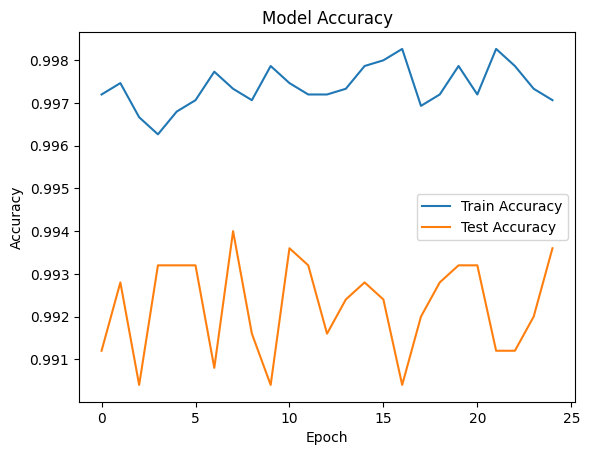

In [19]:
import matplotlib.pyplot as plt

history = ann.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [24]:
loss, accuracy = ann.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9936 - loss: 0.0192
Test Loss: 0.0192
Test Accuracy: 0.9936


In [25]:
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0059 - val_accuracy: 0.9987 - val_loss: 0.0089
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9967 - val_loss: 0.0107
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0052 - val_accuracy: 0.9967 - val_loss: 0.0094
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.9967 - val_loss: 0.0104
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9940 - val_loss: 0.0143
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0052 - val_accuracy: 0.9927 - val_loss: 0.0184
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0050 - val_accuracy: 0.9967 - val_loss: 0.0116
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0051 - val_accu

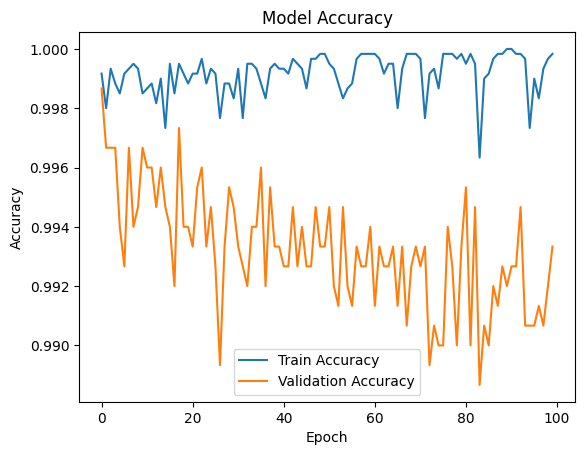

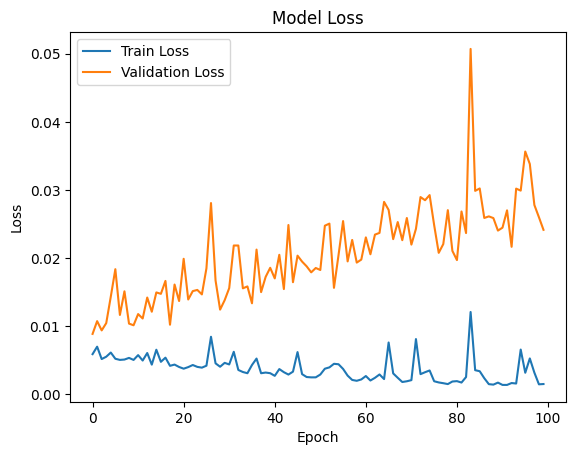

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Confusion Matrix:
 [[1358   13]
 [   6 1123]]

Accuracy: 0.9924

Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1371
           1       0.99      0.99      0.99      1129

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

